<a href="https://colab.research.google.com/github/yuyunliu33/MAIS202-MLbootcamp/blob/master/MAIS202_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAIS 202 Winter 2020 - Assignment 1

Welcome to the MAIS 202 ML bootcamp! Get ready for an amazing, ML-filled 10 weeks :)

In this first assignment, we will be implementing the first concept taught in every ML class: linear regression. Specifically, we will be solidifying your knowledge of linear regression, gradient descent, training-validation-testing split, overfitting/underfitting, and L2 regularization. While you will likely never have to implement your own linear regression algorithm from scratch in practice, doing so will help you better understand the underlying mathematics behind the concepts.

* [Question 1](#scrollTo=yPa8GRh4Ax-b)
* [Question 2](#scrollTo=7OANFdRrAx-i)
* [Question 3](#scrollTo=DKeqX2vgAx_d)
* [Question 4](#scrollTo=HCqVvsNsSmSo)
* [Question 5](#scrollTo=6LygvqAhAx_j)

For those of you who've never used Jupyter/Collab notebooks before, simply press `Ctrl` + `Enter`, or click the play button in the top left, to run each cell

As well, you may see some `assert` statements throughout the code. These are used within or after questions to help you ensure that your answers have the correct dimensions. If your answers do not have the correct dimensions, an `assertionError` will be thrown.

$% latex commands for latex use$
$\newcommand{\transpose}{^{\operatorname T}}$

In [0]:
# we will start by installing then importing the relevant Python libraries
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) Read in the data

We're given three csv's for this assignment, `Dataset_1_train.csv`, `Dataset_1_valid.csv`, and `Dataset_1_test.csv`, which will be our training, validation, and test sets respectively. As mentioned in lectures, it's important to train our model on only a portion of the data available (the training set). Testing our model on data it has never seen gives us a better measure of the model's accuracy and tells us whether or not the model has overfit/underfit.

The validation set is used during model development to 1) check the performance, bias (underfitting), and variance (overfitting) of the model, and 2) to tune hyperparameters. (We will be using the validation set for hyperparameter tuning later in the assignment.) Even though the model never explicitly trains on the validation set, our hyperparmaeters may still be tweaked in favour of validation set performance. As a result, we need the test set, which is only used at the very end of the ML pipeline, to measure the model's accuracy on truly unseen data.

In [0]:
# read in the data as pandas dataframes
data_train = pd.read_csv('https://raw.githubusercontent.com/cclin130/mais-202-assignment-2-f2019/master/Dataset_1_train.csv', header=None).sort_values(0)
X_train = np.array(data_train.iloc[:,0]) # take all values from 1st column (i=0) and transform into an array
X_train = np.reshape(X_train, (len(X_train),1)) # reshape array (len(X_train by 1)): array -> arrays of array
y_train = np.array(data_train.iloc[:,1])
y_train = np.reshape(y_train, (len(y_train),1)) 

data_valid = pd.read_csv('https://raw.githubusercontent.com/cclin130/mais-202-assignment-2-f2019/master/Dataset_1_valid.csv', header=None).sort_values(0)
X_valid = np.array(data_valid.iloc[:,0])
X_valid = np.reshape(X_valid, (len(X_valid),1))
y_valid = np.array(data_valid.iloc[:,1])
y_valid = np.reshape(y_valid, (len(y_valid),1))

data_test = pd.read_csv('https://raw.githubusercontent.com/cclin130/mais-202-assignment-2-f2019/master/Dataset_1_test.csv', header=None).sort_values(0)
X_test = np.array(data_test.iloc[:,0])
X_test = np.reshape(X_test, (len(X_test),1))
y_test = np.array(data_test.iloc[:,1])
y_test = np.reshape(y_test, (len(y_test),1))

Let's take a look at what our data looks like

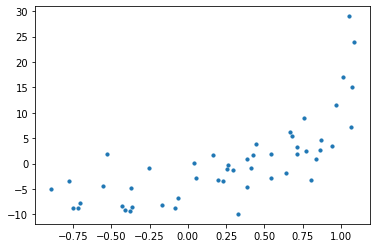

In [0]:
plt.scatter(X_train, y_train, s=10)
plt.show()

## 2) Linear Regression

**This is a reminder that for this assignment, while you may use general utility libraries like numpy and pandas (specifically their matrix computations and data manipulations), pre-existing implementations of the model is prohibited.**

### Q1: linear regression via closed-form ordinary least square solution

Now we will implement polynomial regression for a 15-degree polynomial. As we saw in lectures, linear regression aims to find a solution to the equation:

$$Y(X) = W^{\operatorname T} \cdot \phi(X)$$

where

$$\phi(X) = \left[  1 ,  X ,  X^2 ,  X^3 , \ldots,  X^n  \right]$$

(Note: the powers of X in the $\phi$ operation is an element-wise power)

The model does this by "tweaking" (aka training) W to maximize the probability function:

$$p\left(y \; \middle |\; W^{\operatorname T} x\right)$$
 
The closed-form ordinary least square solution to this problem (found by setting the gradient to 0) is:

$$W = \left(X^{\operatorname T} X\right)^{-1}X^{\operatorname T}Y$$

Now that we have the building blocks for linear regression, we can code it.

*Note: Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. You must understand the underlying math before being able to implement this properly.*

In [0]:
### YOUR CODE HERE - Create the polynomial matrix ϕ(X) for the train, valid, and test sets

X_train_poly = []
X_valid_poly = []
X_test_poly = []

for e in X_train:
  tmp = np.array([])
  for i in range(16):
    tmp = np.append(tmp, (e**i))
  X_train_poly.append(tmp)
for e in X_valid:
  tmp = np.array([])
  for i in range(16):
    tmp = np.append(tmp, (e**i))
  X_valid_poly.append(tmp)
for e in X_test:
  tmp = np.array([])
  for i in range(16):
    tmp = np.append(tmp, (e**i))
  X_test_poly.append(tmp)

X_train_poly = np.array(X_train_poly)
X_valid_poly = np.array(X_valid_poly)
X_test_poly = np.array(X_test_poly)

# this checks that your X_poly's have the correct dimensions:
assert (X_train_poly.shape[0] == 50 and X_train_poly.shape[1] == 16)
assert (X_valid_poly.shape[0] == 50 and X_valid_poly.shape[1] == 16)
assert (X_test_poly.shape[0] == 50 and X_test_poly.shape[1] == 16)

### YOUR CODE HERE - Calculate the weighted matrix, save to variable 'W'
# hint: this is your "training" phase, so you should only use X_train_poly and y_train

X_transpose = np.transpose(X_train_poly)

# dot product between X^T and X then take the inverse
inverse = np.linalg.inv(np.dot(X_transpose, X_train_poly))
XtY = np.dot(X_transpose, y_train)
W = np.dot(inverse, XtY)

# this checks that W has the correct dimensions:
assert (W.shape[0] == 16 and W.shape[1] == 1)

### YOUR CODE HERE - Make predictions on the training set
# make training set predictions, save to variable 'y_train_pred'
# Hint (for matrix multiplication errors):
# in the math above, the matrix X had dimensions
# (polynomial degree x num samples). However, your X_poly's have
# dimensions (num samples x polynomial degree).

y_train_pred = np.transpose(np.dot(np.transpose(W), np.transpose(X_train_poly))) # (1,16) by (16,50)

# this checks that W has the correct dimensions:
assert (y_train_pred.shape[0] == 50 and y_train_pred.shape[1] == 1)

### YOUR CODE HERE - calculate mean squared error, save to variable 'mse_train'
mse_train = (sum((y_train - y_train_pred)**2))/50
print("Training set Mean Squared Error: {}".format(mse_train))

### YOUR CODE HERE - Make predictions on the validation set and calculate the mean squared error.
# make validation set predictions, save to variable 'y_valid_pred'
y_valid_pred = np.transpose(np.dot(np.transpose(W), np.transpose(X_valid_poly)))

# calculate mean squared error, save to variable 'mse_valid'
mse_valid = (sum((y_valid - y_valid_pred)**2))/50
print("Validation set Mean Squared Error: {}".format(mse_valid))

Training set Mean Squared Error: [12.39677454]
Validation set Mean Squared Error: [20508.1147195]


In [0]:
print(W)

[[-4.23204116]
 [ 7.82410612]
 [ 5.76019261]
 [-4.08294424]
 [-3.71613534]
 [-1.87429663]
 [-2.28176549]
 [ 1.42612051]
 [ 2.28619872]
 [ 3.933778  ]
 [ 4.89291647]
 [ 3.92752678]
 [ 3.84607067]
 [ 0.68935776]
 [-0.87067419]
 [-5.53306641]]


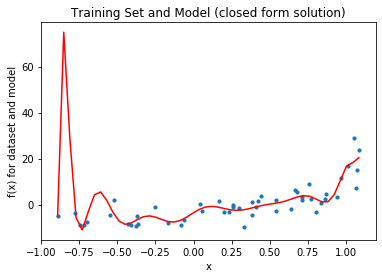

In [0]:
# plot training set using weights
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_train), max(X_train))
plt.plot(x_axis, function(x_axis), 'r', label='15 Degree Polynomial Fit')
plt.scatter(X_train, y_train, s=10, label='Training set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model (closed form solution)")
plt.show()

You should be getting a train MSE of around 11.519 and a validation MSE of around 14527. Something to note here is how much larger the validation set error is than the train error. Keep this in mind as we continue with the assignment.

### Q2: linear regression via gradient descent

We will now implement the same polynomial regression from above, but using gradient descent! In ML, we can't always optimize our cost functions with a closed form solution like in question 1 (it's often too computationally expensive). Thankfully, optimization algorithms, one of which is gradient descent, can help us approximate the minimum of the cost function.

Recall that the cost function for linear regression is:

$$ J(W) = \frac{1}{2m} \cdot \sum_{i=0}^{m}\left (W\transpose x^{(i)} - y^{(i)}\right)^2 $$

Where _i_ represents the sample number out of a total of *m* samples. Notice that the second factor is the sum of the squared errors. The $\frac{1}{m}$ is to calculate the mean of the squared errors, and the $\frac{1}{2}$ is to make the gradient nicer.

When we take the partial derivative of J(W) with respect to weight $W_j$, the jth parameter of vector _W_, we get:

$$ \frac{dJ}{dw_j} = \frac{1}{m}\sum_{i=0}^{m}\left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)} $$

Where $x_j^{(i)}$ is the jth parameter of the vector $x^{(i)}$.

The following is the gradient descent algorithm for linear regression:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for $w_j$ in W:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>$\displaystyle w_j := w_j - \alpha \cdot \frac{1}{m}\sum_{i=0}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}$
    
We can run the gradient descent update for as many itertions as needed until the amount the gradients change each loop is negligible (less than a given _epsilon_). 

In [0]:
# we start by defining the relevant constants
learning_rate = 0.55
epsilon = 0.0003

# weight matrix will be 16x1
# we initialize the weights at 0
W = np.zeros((16, 1))

To implement the gradient descent algorithm, we will need:
1. a function that calculates the gradients of J (the cost function), with respect to each entry in W (i.e. each $w_j$)
2. a function that calculates the change in the values of W after each gradient descent update
3. a while loop that performs gradient descent by caling the above 2 functions, until the change in W < `epsilon`

*Note: training might take one or two minutes*

In [0]:
# function that calculates the gradient
def calculate_grad(X_poly, y, W):
  # let dW represent dJ/dW
  dW = np.zeros((16,1))
  m = len(X_poly)
  y_pred = np.matmul(X_poly, W)
  x_i =  np.hsplit(X_train_poly, 16)

  for j, w_j in enumerate(W):
    ### YOUR CODE HERE - Calculate dW[j]
    # Hint: You might find 'y_pred' helpful
    # Hint: There is a way to do this without for-looping through every row (sample) in X_poly
    # (And if you're having trouble, you can always go to office hours)
    
    dW[j] = (1/m) * np.sum(np.dot(np.transpose(y_pred - y), x_i[j]))
  return dW

# function that caculates the change in W
def calculate_dist(W_prev, W_cur):
  return np.sqrt(np.sum((W_cur - W_prev)**2))

In [0]:
# use the above 2 functions to perform gradient descent
def train_polynomial_regression(X_poly, y, W, learning_rate, epsilon):
  epoch_count = 0

  while True:
      #calculate current gradient
      dW = calculate_grad(X_poly, y, W)

      W_prev = W.copy()

      ### YOUR CODE HERE - update each W[j] using the given learning_rate
      for j, w_j in enumerate(W): 
        W[j] = w_j - ((learning_rate) * calculate_grad(X_poly, y, W)[j])
        
      ### ------------------------------

      diff = calculate_dist(W_prev, W)
      if (diff < epsilon):
          break

      epoch_count +=1
      # print train error every 50 iterations
      if epoch_count % 20000 == 0:
        y_train_pred = np.matmul(X_train_poly, W)
        print('Training set Mean Squared Error: {}'.format(np.power((y_train_pred - y_train), 2).mean()))
  
  print('Training complete.')
  return W

In [0]:
W = train_polynomial_regression(X_train_poly, y_train, W, learning_rate, epsilon)

#calculated MSE
y_valid_pred = np.matmul(X_valid_poly, W)
mse_valid = np.power((y_valid_pred - y_valid), 2).mean()
print('\nValidation set Mean Squared Error: {}'.format(mse_valid))

Training set Mean Squared Error: 15.952937031667943
Training set Mean Squared Error: 15.845936621903862
Training set Mean Squared Error: 15.764945361972323
Training set Mean Squared Error: 15.69949114281912
Training set Mean Squared Error: 15.644803685770912
Training set Mean Squared Error: 15.598426903788893
Training set Mean Squared Error: 15.558814654320484
Training set Mean Squared Error: 15.524825349138746
Training set Mean Squared Error: 15.49554071096103
Training set Mean Squared Error: 15.470196368830381
Training set Mean Squared Error: 15.448149879800903
Training set Mean Squared Error: 15.428861124710748
Training set Mean Squared Error: 15.41187714585018
Training set Mean Squared Error: 15.396819148998288
Training set Mean Squared Error: 15.383371102172314
Training set Mean Squared Error: 15.371269791658758
Training set Mean Squared Error: 15.360296251950519
Training set Mean Squared Error: 15.35026846111691
Training set Mean Squared Error: 15.341035168220028
Training set Mea

Great job! You just implemented polynomial regression in two different ways. You should be getting a final training MSE of around 13.3 and validation MSE of around 638.9. Let's now plot the results of gradient descent.

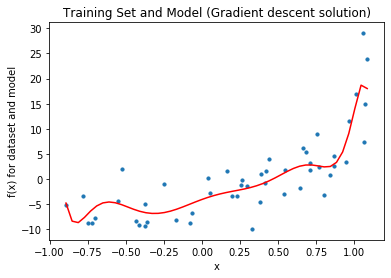

In [0]:
# plot training set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_train), max(X_train))
plt.plot(x_axis, function(x_axis), 'r', label='15 Degree Polynomial Fit')
plt.scatter(X_train, y_train, s=10, label='Training set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model (Gradient descent solution)")
plt.show()

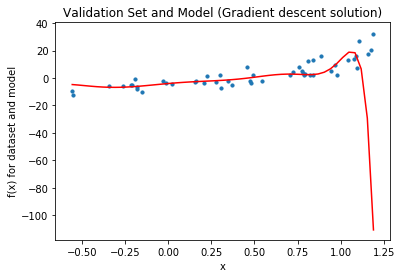

In [0]:
# plot validation set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_valid), max(X_valid))
plt.plot(x_axis, function(x_axis), 'r', label="15 Degree Polynomial Fit")
plt.scatter(X_valid, y_valid, s=10, label='Validation set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Validation Set and Model (Gradient descent solution)")
plt.show()

As you can see again, the MSE of the validation set is much higher than that of the training set; in other words, our model doesn't perform that well on the validation set. You may have also noticed that the results from gradient descent do not perfectly match the results from calculating _W_ using the closed-form solution. Given our low number of data points, in this case finding the minimum of the cost function with gradient descent takes longer than using the approach from Q1. (If you want to get the exact results, just run the training cell again and keep iterating--but it might take a while.)

### Q3: Using your knowledge from the lectures, explain whether the model is overfitting or underfitting the training data and a potential reason why.

### YOUR ANSWER HERE
The model is overfitting on training data. A potential reason why it would be overfitting is that the data is not complete enough; it does not cover the majority of the cases but only a part of all the cases. 

## 3) Regularization



### Q4: regularized linear regression via gradient descent

One way to address overfitting is to add regularization. In this part of the assignment, we will be adding *L2 regularization* to gradient descent.

Recall that with regularization, the Residual Sum of Squares equation becomes:

$$ RSS(W) =  \sum_{i=0}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right)^2 + \lambda \cdot \sum_{j=1}^{p} w_j^2$$

Where _i_ represents the sample number out of a total of *m* samples and $w_j$ represents the jth parameter of W out of _p_ parameters. The reason j starts at 1 in the regularization sum is because we normally don't regularize the bias term $w_0$.

Making these same changes to our cost function from Q2, we have:

$$ J(W) = \frac{1}{2m}\left[\sum_{i=0}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right)^2 + \lambda \cdot \sum_{j=1}^{p} w_j^2\right]$$

Once again, the $\frac{1}{m}$ is to calculate the mean of the squared errors, and the $\frac{1}{2}$ is to make the gradient nicer.

Now, when we take the partial derivative of J(W) with respect to weight $w_j$, the jth parameter of vector _W_, we get a different result for $w_0$ than for the rest of the parameters:

$$ \begin{aligned} \frac{dJ}{dw_0} &= \frac{1}{m}\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)} \\
 \frac{dJ}{dw_j} &= \frac{1}{m}\left(\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}\right) + \frac{\lambda}{m} \cdot w_j \quad \text{for}\ j = 1, 2, \ldots, p \end{aligned} $$

Putting this all together into the gradient descent algorithm for regularized linear regression gives us:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for $w_j$ in W:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>if j = 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>$\displaystyle w_j := w_j - \alpha \cdot \frac{1}{m}\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>else<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<t>$\displaystyle w_j := w_j - \alpha \cdot \left(\left(\frac{1}{m}\sum_{i=1}^{m} \left(W\transpose x^{(i)} - y^{(i)}\right) \cdot x_j^{(i)}\right) + \frac{\lambda}{m} \cdot w_j\right) $<br>
    
We can run the gradient descent update for as many itertions as needed until the amount the gradients change each loop is negligible (less than a given _epsilon_). 

In [0]:
# we start by defining the relevant constants (the same as Q2)
learning_rate = 0.3
epsilon = 0.001
lambda_value = 0.3

# weight matrix will be 16x1
# we initialize the weights at 0
W = np.zeros((16, 1))

To implement the gradient descent algorithm with regularization, we will need:
1. a function that calculates the gradients of J (the cost function including regularization terms), with respect to each entry in W
2. a function that calculates the change in the values of W after each gradient descent update
3. a while loop that performs gradient descent until the change in W < epsilon

*Note: training might take one or two minutes*

In [0]:
# function that calculates the gradient
def calculate_regularized_grad(X_poly, y, W, lambda_value):
    # let dW store dJ/dW
    dW = np.zeros((16,1))
    m = len(X_poly)
    y_pred = np.matmul(X_poly, W)

    x_i = np.hsplit(X_poly, 16) # get a list of arrays; each array represent matrix of x^(i) at jth position (each column is a jth position and row represent a x^(i))
    
    for j, w_j in enumerate(W):
        ### YOUR CODE HERE - Calculate dW[j]
        # Hint: You can just copy your implementation from Q2
        # then append the L2 regularization term at the end
        
        if j == 0:
          dW[j] = (1/m) * np.sum(np.dot(np.transpose(y_pred - y), x_i[j]))
        else:
          dW[j] = ((1/m) * np.sum(np.dot(np.transpose(y_pred - y), x_i[j]))) + ((lambda_value*w_j)/m)
        
        ### ------------------------------
        
    return dW

# function that caculates the change in W
def calculate_dist(W_prev, W_cur):
    return np.sqrt(np.sum((W_cur - W_prev)**2))

In [0]:
# use the above 2 functions to perform regularized gradient descent
def train_regularized_polynomial_regression(X_poly, y, W, learning_rate, epsilon, lambda_value, verbose=True):
  epoch_count = 0
  while True:
      #calculate current gradient
      dW = calculate_regularized_grad(X_poly, y, W, lambda_value)

      W_prev = W.copy()

      ### YOUR CODE HERE - update W[j] using the given learning_rate
      # Hint: This should be the same as your implementation from Q2

      for j, w_j in enumerate(W): 
        W[j] = w_j - ((learning_rate) * calculate_regularized_grad(X_poly, y, W, lambda_value)[j])
      
      ### ------------------------------

      diff = calculate_dist(W_prev, W)
      if (diff < epsilon):
          break

      epoch_count +=1
      # print train error every 50 iterations
      if verbose:
        if epoch_count % 100 == 0:
          y_train_pred = np.matmul(X_train_poly, W)
          print('Training set Mean Squared Error: {}'.format(np.power((y_train_pred - y_train), 2).mean()))

  print('Training complete.')
  return W

In [0]:
W = train_regularized_polynomial_regression(X_train_poly, y_train, W, learning_rate, epsilon, lambda_value)
#calculated MSE
y_valid_pred = np.matmul(X_valid_poly, W)
mse_valid = np.power((y_valid_pred - y_valid), 2).mean()
print('\nValidation set Mean Squared Error: {}'.format(mse_valid))

Training set Mean Squared Error: 16.948406953667916
Training set Mean Squared Error: 16.824033307894315
Training set Mean Squared Error: 16.780905034785203
Training set Mean Squared Error: 16.759995868979328
Training set Mean Squared Error: 16.74740096822145
Training set Mean Squared Error: 16.73877581726466
Training set Mean Squared Error: 16.732426310651544
Training set Mean Squared Error: 16.72756408838407
Training complete.

Validation set Mean Squared Error: 40.879468347745025


You should be getting a final training MSE of around 16.07 and validation MSE of around 23.3. Now we plot our training results.

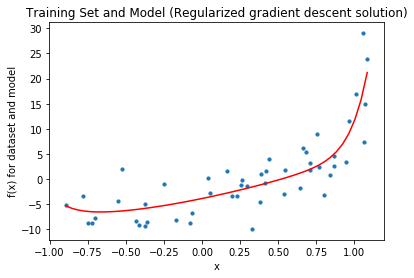

In [0]:
# plot training set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_train), max(X_train))
plt.plot(x_axis, function(x_axis), 'r', label='15 Degree Polynomial Fit')
plt.scatter(X_train, y_train, s=10, label='Training set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Training Set and Model (Regularized gradient descent solution)")
plt.show()

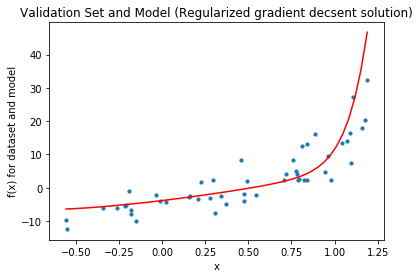

In [0]:
# plot validation set using weights from gradient descent
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_valid), max(X_valid))
plt.plot(x_axis, function(x_axis), 'r', label="15 Degree Polynomial Fit")
plt.scatter(X_valid, y_valid, s=10, label='Validation set')
plt.xlabel("x")
plt.ylabel("f(x) for dataset and model")
plt.title("Validation Set and Model (Regularized gradient decsent solution)")
plt.show()

As you can see, this new model generalizes better to our validation set. However, while it does well, we don't really know if this is the absolute most-generalizable model we can create, since we chose the *lambda_value* pretty arbitrarily. We need to tune lambda (aka how much we penalize large weights) to decrease overfitting as much as possible.

This is where our validation set comes in. We already know that our training algorithm works, but we need to tune lambda via trial-and-error to optimize for a model that performs the best on unseen data. We choose to use a validation set instead of our test set because we need completely new test set data to obtain a truly fair performance metric at the end. To reiterate, hyperparmaeter-tuning with the validation set means that our model is "fit" (to some extent) to the cross validation data, so measuring performance on the validation set gives our model an unfair advantage.

Run the following cell to loop through a list of potential lambda values to find the best one.

In [0]:
learning_rate = 0.3
epsilon = 0.001
cross_validation_weights = []
cross_validation_MSEs = []
lambda_list = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]

for lambda_value in lambda_list:
  W = np.zeros((16, 1))
  W = train_regularized_polynomial_regression(X_train_poly, y_train, W,
                                              learning_rate, epsilon,
                                              lambda_value, verbose=False)
  
  #calculated MSE
  y_valid_pred = np.matmul(X_valid_poly, W)
  mse_valid = np.power((y_valid_pred - y_valid), 2).mean()
  print('\nValidation set MSE for {0} lambda: {1}\n'.format(lambda_value, mse_valid))
  
  cross_validation_weights.append(W)
  cross_validation_MSEs.append(mse_valid)

Training complete.

Validation set MSE for 0.001 lambda: 59.3810673140492

Training complete.

Validation set MSE for 0.003 lambda: 45.32454512287411

Training complete.

Validation set MSE for 0.01 lambda: 27.717051090222203

Training complete.

Validation set MSE for 0.03 lambda: 23.069371330967357

Training complete.

Validation set MSE for 0.1 lambda: 32.27033903628087

Training complete.

Validation set MSE for 0.3 lambda: 40.879468347745025

Training complete.

Validation set MSE for 1 lambda: 43.03783177628677

Training complete.

Validation set MSE for 3 lambda: 45.10938065256161



Let's plot the results from our cross validation.

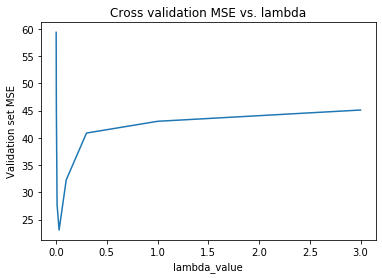

In [0]:
plt.plot(lambda_list, cross_validation_MSEs)
plt.xlabel('lambda_value')
plt.ylabel('Validation set MSE')
plt.title("Cross validation MSE vs. lambda")
plt.show()

We can now pick the best weight from the ones we've trained, and then measure model performance on the test set.

Best lambda: 0.03

Test set MSE: 20.157764703685334



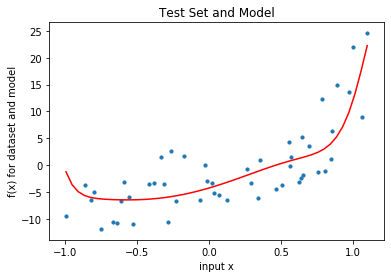

In [0]:
lambda_value = lambda_list[np.argmin(cross_validation_MSEs)]
print('Best lambda: {}'.format(lambda_value))

# pick best weight
W = cross_validation_weights[np.argmin(cross_validation_MSEs)]

# calculate MSE on test set
y_test_pred = np.matmul(X_test_poly, W)
mse_test = np.power((y_test_pred - y_test), 2).mean()
print('\nTest set MSE: {}\n'.format(mse_test))

# plot the results
function = np.poly1d(np.flip(W[:, 0], 0)) 
x_axis = np.linspace(min(X_test), max(X_test))
plt.plot(x_axis, function(x_axis), 'r', label="15 Degree Polynomial Fit")
plt.scatter(X_test, y_test, s=10, label='Validation set')
plt.xlabel("input x")
plt.ylabel("f(x) for dataset and model")
plt.title("Test Set and Model")
plt.show()

### Q5: What do you think is the degree of the source polynomial? What evidence in the previous cells indicate that regularization addressed the issues of overfitting/underfitting mentioned in Q3? Explain your answer.

I think it would still be a 15 degree polynomial. Regularization attempts to reduce the variance of the estimator. It tries to find the best lambda to overcome the issues of overfitting. 

#### This is the end of your first MAIS 202 assignment. To submit this assignment, download it as a python file and rename it to `assignment1.py`. Then log onto okpy (you should've received a class invite) and submit to the Assignment 1.